## 1. Importación de Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from supabase import create_client, Client
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print('Librerías importadas exitosamente')

Librerías importadas exitosamente


## 2. Carga de Datos

In [2]:
# Cargar el dataset
url_github = "https://raw.githubusercontent.com/caamilo03/Salud-mental-Nodo/main/data/raw/1-%20mental-illnesses-prevalence.csv"
df = pd.read_csv(url_github)

print(f"Dimensiones del dataset: {df.shape[0]} filas x {df.shape[1]} columnas")
print(f"\nPrimeras filas:")
df.head()

Dimensiones del dataset: 6420 filas x 8 columnas

Primeras filas:


,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815


## 3. Exploración Inicial

In [3]:
# Información general del dataset
print("=== INFORMACIÓN DEL DATASET ===")
df.info()

print("\n=== COLUMNAS ===")
for col in df.columns:
    print(f"- {col}")

=== INFORMACIÓN DEL DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 8 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Entity                                                                             6420 non-null   object 
 1   Code                                                                               6150 non-null   object 
 2   Year                                                                               6420 non-null   int64  
 3   Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  6420 non-null   float64
 4   Depressive disorders (share of population) - Sex: Both - Age: Age-standardized     6420 non-null   float64
 5   Anxiety disorders (share of population) - Sex: Both - Age: Age-standardiz

In [4]:
# Verificar valores nulos
print("=== VALORES NULOS ===")
nulos = df.isnull().sum()
porcentaje_nulos = (nulos / len(df)) * 100

nulos_df = pd.DataFrame({
    'Columna': nulos.index,
    'Valores Nulos': nulos.values,
    'Porcentaje': porcentaje_nulos.values
})

nulos_df[nulos_df['Valores Nulos'] > 0]

=== VALORES NULOS ===


,Columna,Valores Nulos,Porcentaje
1,Code,270,4.205607


In [5]:
# Verificar duplicados
duplicados = df.duplicated().sum()
print(f"Registros duplicados: {duplicados}")

# Verificar duplicados por país y año
duplicados_pais_anio = df.duplicated(subset=['Entity', 'Year']).sum()
print(f"Registros duplicados (por país y año): {duplicados_pais_anio}")

Registros duplicados: 0
Registros duplicados (por país y año): 0


In [6]:
# Estadísticas descriptivas
print("=== ESTADÍSTICAS DESCRIPTIVAS ===")
df.describe()

=== ESTADÍSTICAS DESCRIPTIVAS ===


,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
count,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000
mean,2004.500000,0.266604,3.767036,4.101840,0.636968,0.195664
std,8.656116,0.039383,0.925286,1.050543,0.233391,0.138380
min,1990.000000,0.188416,1.522333,1.879996,0.181667,0.044780
25%,1997.000000,0.242267,3.080036,3.425846,0.520872,0.096416
50%,2004.500000,0.273477,3.636772,3.939547,0.579331,0.144150
75%,2012.000000,0.286575,4.366252,4.564164,0.844406,0.251167
max,2019.000000,0.462045,7.645899,8.624634,1.506730,1.031688


## 4. Limpieza de Datos

In [7]:
# Crear copia para limpieza
df_clean = df.copy()

print(f"Registros antes de limpieza: {len(df_clean)}")

# Eliminar filas con valores nulos
df_clean = df_clean.dropna()

print(f"Registros después de eliminar nulos: {len(df_clean)}")

# Eliminar duplicados
df_clean = df_clean.drop_duplicates()

print(f"Registros después de eliminar duplicados: {len(df_clean)}")

Registros antes de limpieza: 6420
Registros después de eliminar nulos: 6150
Registros después de eliminar duplicados: 6150


In [8]:
# Renombrar columnas a español (más corto)
df_clean = df_clean.rename(columns={
    "Entity": "pais",
    "Code": "codigo_pais",
    "Year": "anio",
    "Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized": "esquizofrenia",
    "Depressive disorders (share of population) - Sex: Both - Age: Age-standardized": "depresion",
    "Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized": "ansiedad",
    "Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized": "bipolaridad",
    "Eating disorders (share of population) - Sex: Both - Age: Age-standardized": "trastornos_alimenticios"
})

print("Columnas renombradas:")
print(df_clean.columns.tolist())

Columnas renombradas:
['pais', 'codigo_pais', 'anio', 'esquizofrenia', 'depresion', 'ansiedad', 'bipolaridad', 'trastornos_alimenticios']


In [9]:
# Convertir tipos de datos
df_clean['anio'] = df_clean['anio'].astype(int)

# Verificar tipos
print("Tipos de datos:")
print(df_clean.dtypes)

Tipos de datos:
pais                        object
codigo_pais                 object
anio                         int64
esquizofrenia              float64
depresion                  float64
ansiedad                   float64
bipolaridad                float64
trastornos_alimenticios    float64
dtype: object


## 5. Creación de Variables Derivadas

In [10]:
# Variable derivada 1: Promedio de prevalencia de todas las enfermedades
columnas_enfermedades = ['esquizofrenia', 'depresion', 'ansiedad', 'bipolaridad', 'trastornos_alimenticios']
df_clean['promedio_prevalencia'] = df_clean[columnas_enfermedades].mean(axis=1)

print("Variable 'promedio_prevalencia' creada")
print(f"Promedio general: {df_clean['promedio_prevalencia'].mean():.2f}%")

Variable 'promedio_prevalencia' creada
Promedio general: 1.79%


In [11]:
# Variable derivada 2: Suma total de prevalencia
df_clean['total_prevalencia'] = df_clean[columnas_enfermedades].sum(axis=1)

print("Variable 'total_prevalencia' creada")
print(f"Total promedio: {df_clean['total_prevalencia'].mean():.2f}%")

Variable 'total_prevalencia' creada
Total promedio: 8.96%


In [12]:
# Variable derivada 3: Década
df_clean['decada'] = (df_clean['anio'] // 10) * 10

print("Variable 'decada' creada")
print(f"Décadas en el dataset: {sorted(df_clean['decada'].unique())}")

Variable 'decada' creada
Décadas en el dataset: [np.int64(1990), np.int64(2000), np.int64(2010)]


In [13]:
# Variable derivada 4: Enfermedad más prevalente
df_clean['enfermedad_principal'] = df_clean[columnas_enfermedades].idxmax(axis=1)

print("Variable 'enfermedad_principal' creada")
print("\nDistribución de enfermedad principal:")
print(df_clean['enfermedad_principal'].value_counts())

Variable 'enfermedad_principal' creada

Distribución de enfermedad principal:
enfermedad_principal
ansiedad     3815
depresion    2335
Name: count, dtype: int64


## 6. Agregaciones

In [14]:
# Agregación 1: Promedio por año
print("=== AGREGACIÓN 1: PROMEDIO POR AÑO ===")
promedio_por_anio = df_clean.groupby('anio')[columnas_enfermedades + ['promedio_prevalencia']].mean()
print(promedio_por_anio.tail(10))

=== AGREGACIÓN 1: PROMEDIO POR AÑO ===
      esquizofrenia  depresion  ansiedad  bipolaridad  \
anio                                                    
2010       0.266668   3.717584  4.117535     0.638971   
2011       0.266796   3.712655  4.122578     0.638969   
2012       0.266984   3.707899  4.129607     0.638961   
2013       0.267187   3.704044  4.137598     0.638971   
2014       0.267368   3.700941  4.144872     0.638982   
2015       0.267488   3.699244  4.149755     0.638982   
2016       0.267634   3.697902  4.151158     0.638968   
2017       0.267765   3.697291  4.151387     0.638959   
2018       0.267776   3.700971  4.152565     0.638955   
2019       0.267716   3.708473  4.154588     0.638947   

      trastornos_alimenticios  promedio_prevalencia  
anio                                                 
2010                 0.202319              1.788615  
2011                 0.203519              1.788903  
2012                 0.204724              1.789635  
2013  

In [15]:
# Agregación 2: Top 10 países con mayor prevalencia promedio
print("=== AGREGACIÓN 2: TOP 10 PAÍSES CON MAYOR PREVALENCIA ===")
top_paises = df_clean.groupby('pais')['promedio_prevalencia'].mean().sort_values(ascending=False).head(10)
print(top_paises)

=== AGREGACIÓN 2: TOP 10 PAÍSES CON MAYOR PREVALENCIA ===
pais
Portugal       2.850275
New Zealand    2.694521
Palestine      2.663926
Iran           2.634169
Brazil         2.628962
Greenland      2.508112
Greece         2.502718
Australia      2.497628
Lebanon        2.485696
Ireland        2.448339
Name: promedio_prevalencia, dtype: float64


In [16]:
# Agregación 3: Estadísticas por década
print("=== AGREGACIÓN 3: ESTADÍSTICAS POR DÉCADA ===")
stats_decada = df_clean.groupby('decada')[columnas_enfermedades].agg(['mean', 'std', 'min', 'max'])
print(stats_decada)

=== AGREGACIÓN 3: ESTADÍSTICAS POR DÉCADA ===
       esquizofrenia                               depresion            \
                mean       std       min       max      mean       std   
decada                                                                   
1990        0.264981  0.039016  0.189896  0.449531  3.813128  0.933708   
2000        0.265775  0.039532  0.188860  0.462045  3.780677  0.964601   
2010        0.267338  0.039208  0.188416  0.460500  3.704700  0.917082   

                            ansiedad                                \
             min       max      mean       std       min       max   
decada                                                               
1990    1.553626  7.620522  4.068863  1.027601  2.022093  7.876446   
2000    1.525317  7.645899  4.086080  1.071965  1.879996  8.624634   
2010    1.522333  7.033014  4.141164  1.080766  1.881692  8.496533   

       bipolaridad                               trastornos_alimenticios  \
            

## 7. Visualización Exploratoria

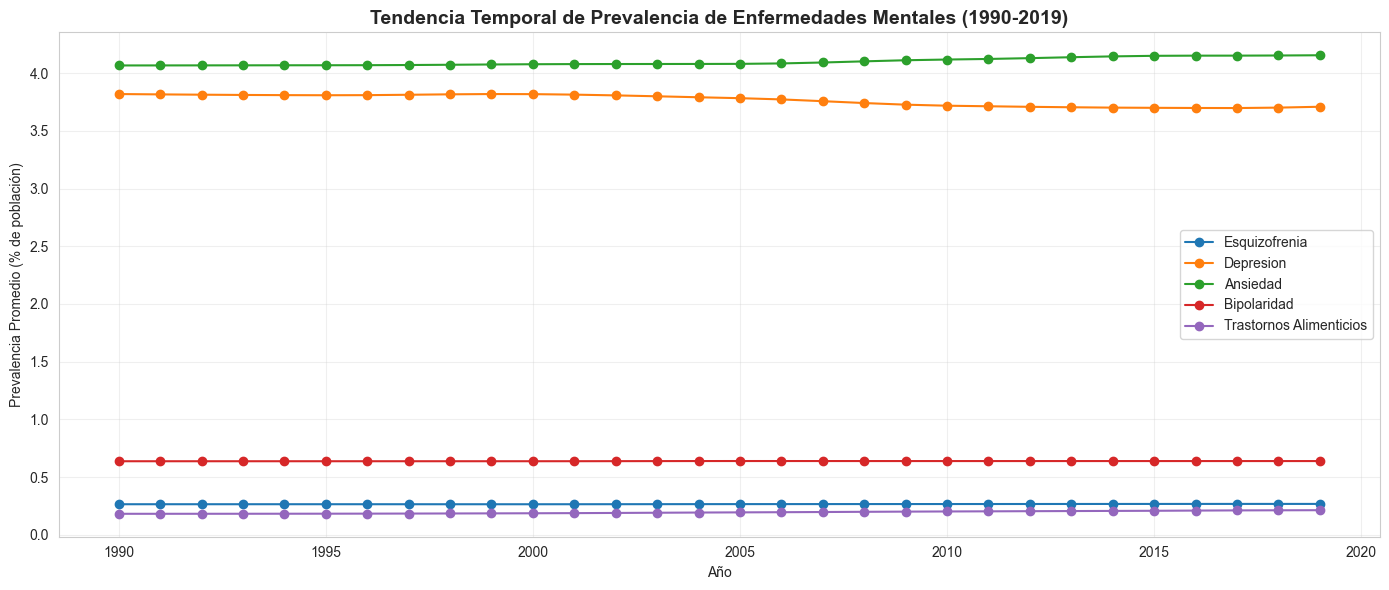

In [17]:
# Visualización 1: Tendencia temporal de cada enfermedad
plt.figure(figsize=(14, 6))
for enfermedad in columnas_enfermedades:
    tendencia = df_clean.groupby('anio')[enfermedad].mean()
    plt.plot(tendencia.index, tendencia.values, marker='o', label=enfermedad.replace('_', ' ').title())

plt.title('Tendencia Temporal de Prevalencia de Enfermedades Mentales (1990-2019)', fontsize=14, fontweight='bold')
plt.xlabel('Año')
plt.ylabel('Prevalencia Promedio (% de población)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

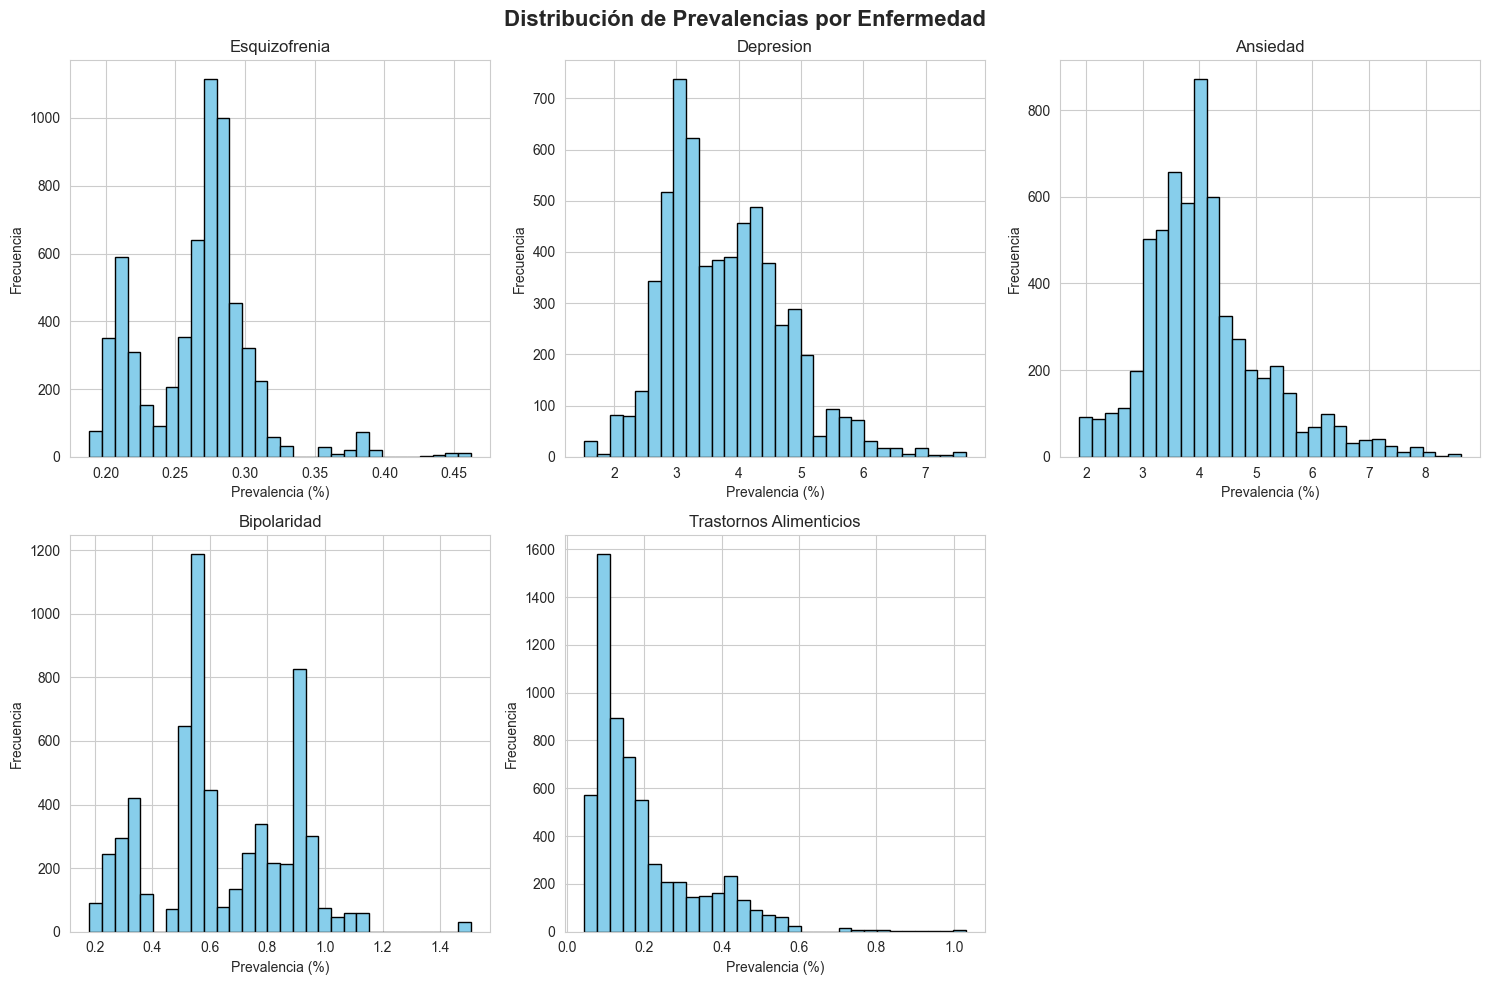

In [18]:
# Visualización 2: Distribución de prevalencias
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, enfermedad in enumerate(columnas_enfermedades):
    axes[i].hist(df_clean[enfermedad], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(enfermedad.replace('_', ' ').title())
    axes[i].set_xlabel('Prevalencia (%)')
    axes[i].set_ylabel('Frecuencia')

# Eliminar el último subplot vacío
fig.delaxes(axes[5])

plt.suptitle('Distribución de Prevalencias por Enfermedad', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

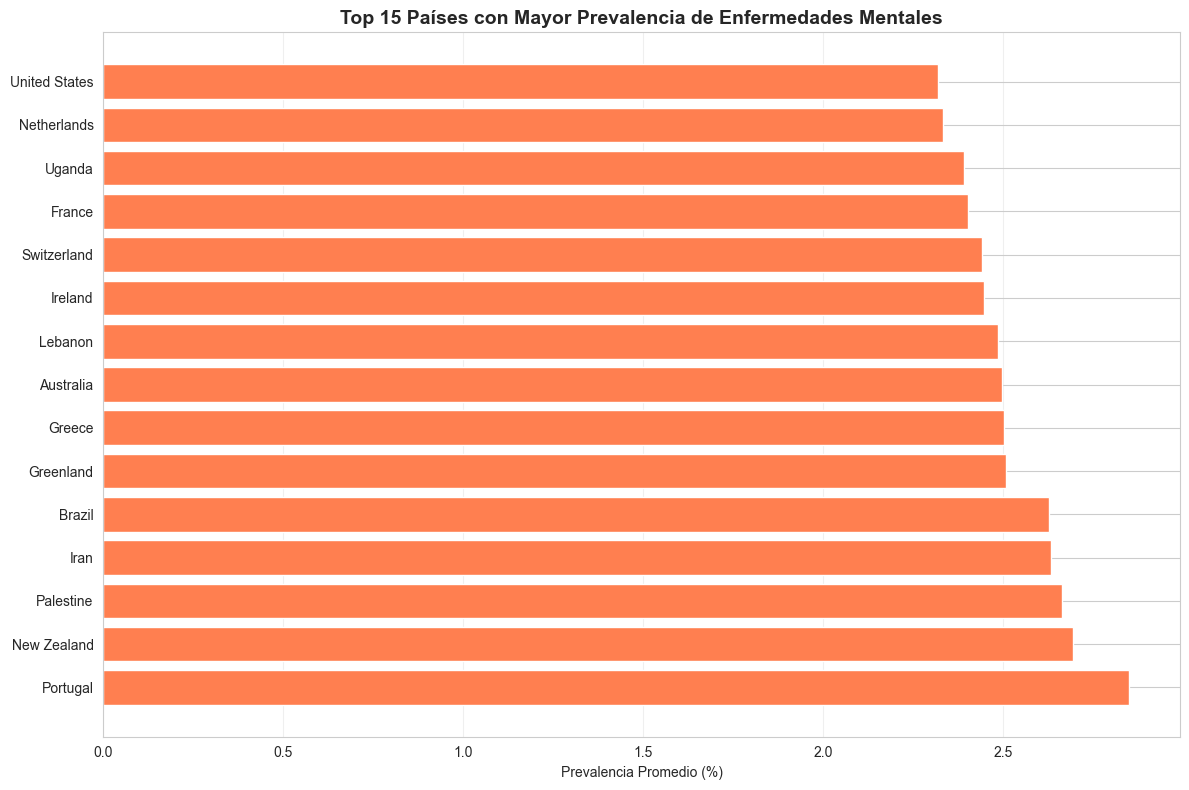

In [19]:
# Visualización 3: Top 15 países con mayor prevalencia promedio
top_15_paises = df_clean.groupby('pais')['promedio_prevalencia'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 8))
plt.barh(range(len(top_15_paises)), top_15_paises.values, color='coral')
plt.yticks(range(len(top_15_paises)), top_15_paises.index)
plt.xlabel('Prevalencia Promedio (%)')
plt.title('Top 15 Países con Mayor Prevalencia de Enfermedades Mentales', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

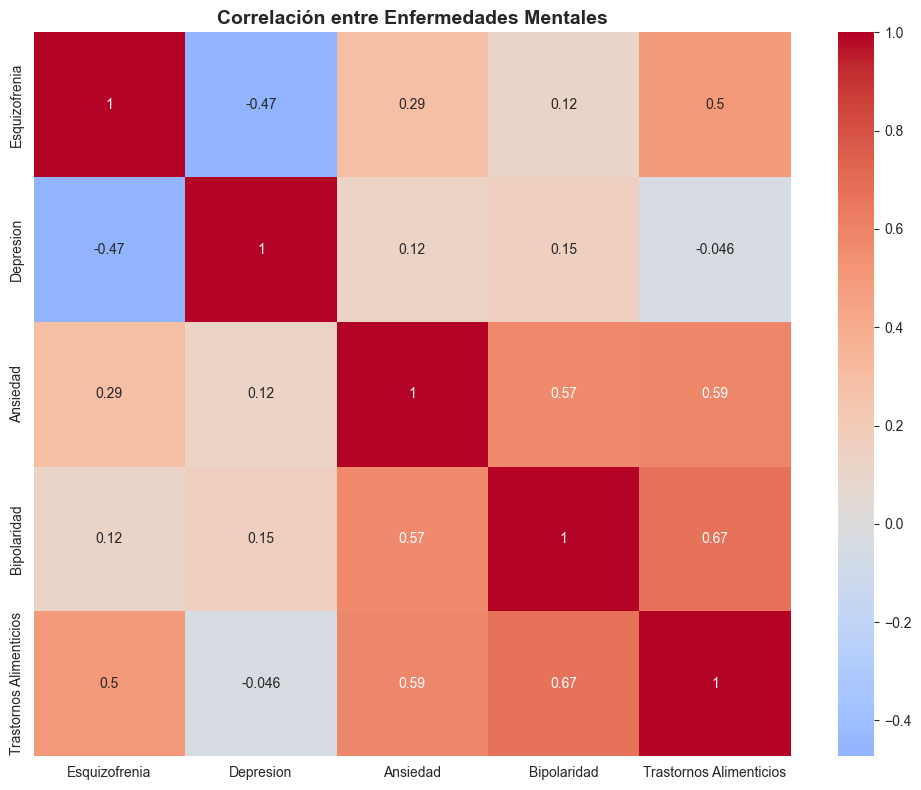

In [20]:
# Visualización 4: Matriz de correlación
plt.figure(figsize=(10, 8))
correlacion = df_clean[columnas_enfermedades].corr()
sns.heatmap(correlacion, annot=True, cmap='coolwarm', center=0, 
            xticklabels=[col.replace('_', ' ').title() for col in columnas_enfermedades],
            yticklabels=[col.replace('_', ' ').title() for col in columnas_enfermedades])
plt.title('Correlación entre Enfermedades Mentales', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 8. Filtrado de Datos (Año 2000 en adelante)

In [ ]:
# Filtrar datos desde el año 2000
df_final = df_clean[df_clean['anio'] >= 2000].copy()

print(f"Registros totales: {len(df_clean)}")
print(f"Registros desde 2000: {len(df_final)}")
print(f"Registros filtrados: {len(df_clean) - len(df_final)}")
print(f"\nRango de años: {df_final['anio'].min()} - {df_final['anio'].max()}")

## 9. Exportación de Datos Procesados

In [ ]:
# Exportar a CSV para Power BI
ruta_salida = "../data/processed/mental_health_procesado.csv"
df_final.to_csv(ruta_salida, index=False, encoding='utf-8')

print(f"Datos exportados exitosamente a: {ruta_salida}")
print(f"Dimensiones finales: {df_final.shape[0]} filas x {df_final.shape[1]} columnas")
print(f"\nColumnas incluidas:")
for col in df_final.columns:
    print(f"  - {col}")

## 10. Conexión a Supabase (Base de Datos en la Nube)

In [ ]:
# Verificar si la tabla ya existe en Supabase
def verificar_tabla_existe(supabase_client, nombre_tabla):
    """
    Verifica si una tabla existe en Supabase intentando hacer una consulta simple.
    
    Args:
        supabase_client: Cliente de Supabase
        nombre_tabla: Nombre de la tabla a verificar
    
    Returns:
        bool: True si la tabla existe, False si no existe
    """
    try:
        # Intentar hacer una consulta simple (limitada a 1 registro)
        response = supabase_client.table(nombre_tabla).select("*").limit(1).execute()
        return True
    except Exception as e:
        # Si hay un error, probablemente la tabla no existe
        error_msg = str(e).lower()
        if "does not exist" in error_msg or "relation" in error_msg:
            return False
        # Si es otro tipo de error, lo reportamos pero asumimos que la tabla existe
        print(f"⚠️ Advertencia al verificar tabla: {e}")
        return True

# Verificar si hay datos en la tabla
def contar_registros_tabla(supabase_client, nombre_tabla):
    """
    Cuenta los registros existentes en la tabla.
    
    Args:
        supabase_client: Cliente de Supabase
        nombre_tabla: Nombre de la tabla
    
    Returns:
        int: Número de registros en la tabla, -1 si hay error
    """
    try:
        response = supabase_client.table(nombre_tabla).select("*", count="exact").limit(0).execute()
        return response.count if hasattr(response, 'count') else 0
    except Exception as e:
        print(f"⚠️ Error al contar registros: {e}")
        return -1

print("✓ Funciones de verificación de tabla definidas")

In [ ]:
# Configuración de Supabase
# NOTA: Reemplazar con tus credenciales reales de Supabase
# Ver guía completa en: docs/guia_supabase.md

SUPABASE_URL = "tu_url_de_supabase"  # Ejemplo: https://xxxxx.supabase.co
SUPABASE_KEY = "tu_key_de_supabase"  # Tu API key pública (anon/public)
NOMBRE_TABLA = "prevalencia_salud_mental"  # Nombre de la tabla en Supabase

# Crear cliente de Supabase
supabase_conectado = False

try:
    supabase: Client = create_client(SUPABASE_URL, SUPABASE_KEY)
    print("✓ Conexión a Supabase establecida")
    supabase_conectado = True
    
    # Verificar si la tabla existe
    tabla_existe = verificar_tabla_existe(supabase, NOMBRE_TABLA)
    
    if tabla_existe:
        # Contar registros existentes
        num_registros = contar_registros_tabla(supabase, NOMBRE_TABLA)
        if num_registros >= 0:
            print(f"✓ Tabla '{NOMBRE_TABLA}' encontrada con {num_registros} registros")
        else:
            print(f"✓ Tabla '{NOMBRE_TABLA}' existe")
    else:
        print(f"⚠️ Tabla '{NOMBRE_TABLA}' NO existe en la base de datos")
        print(f"   → Debes crearla usando el SQL proporcionado en docs/guia_supabase.md")
        
except Exception as e:
    print(f"✗ Error al conectar con Supabase: {e}")
    print("\n📖 GUÍA PASO A PASO:")
    print("   Revisa el archivo: docs/guia_supabase.md")
    print("\n🔧 PASOS RÁPIDOS:")
    print("   1. Crea una cuenta en https://supabase.com")
    print("   2. Crea un nuevo proyecto")
    print("   3. Obtén tu URL y API Key desde Project Settings > API")
    print("   4. Reemplaza SUPABASE_URL y SUPABASE_KEY arriba")
    print("   5. Crea la tabla usando el SQL del paso 4 de la guía")

In [ ]:
# Insertar datos en Supabase
# IMPORTANTE: Este código solo se ejecutará si:
#   1. Las credenciales están configuradas correctamente
#   2. La tabla existe en la base de datos

if supabase_conectado and tabla_existe:
    try:
        # Verificar si ya hay datos en la tabla
        registros_existentes = contar_registros_tabla(supabase, NOMBRE_TABLA)
        
        if registros_existentes > 0:
            print(f"\n⚠️  La tabla '{NOMBRE_TABLA}' ya contiene {registros_existentes} registros")
            respuesta = input("¿Deseas eliminar los datos existentes y recargar? (s/n): ").lower()
            
            if respuesta == 's':
                print("🗑️  Eliminando datos existentes...")
                # Eliminar todos los registros
                supabase.table(NOMBRE_TABLA).delete().neq('id', 0).execute()
                print("✓ Datos existentes eliminados")
            else:
                print("❌ Carga de datos cancelada. Se mantienen los datos existentes.")
                raise SystemExit("Carga cancelada por el usuario")
        
        # Convertir DataFrame a lista de diccionarios
        print(f"\n📤 Preparando {len(df_final)} registros para insertar...")
        datos_supabase = df_final.to_dict('records')
        
        # Insertar datos en lotes (Supabase recomienda lotes de 1000 registros)
        batch_size = 1000
        total_insertados = 0
        total_lotes = (len(datos_supabase) + batch_size - 1) // batch_size
        
        print(f"📊 Insertando en {total_lotes} lote(s)...\n")
        
        for i in range(0, len(datos_supabase), batch_size):
            batch = datos_supabase[i:i+batch_size]
            lote_actual = (i // batch_size) + 1
            
            try:
                response = supabase.table(NOMBRE_TABLA).insert(batch).execute()
                total_insertados += len(batch)
                print(f"✓ Lote {lote_actual}/{total_lotes}: {total_insertados}/{len(datos_supabase)} registros insertados")
            except Exception as e:
                print(f"✗ Error al insertar lote {lote_actual}: {e}")
                print(f"   Registros insertados hasta el momento: {total_insertados}")
                break
        
        if total_insertados == len(datos_supabase):
            print(f"\n✅ ¡ÉXITO! Todos los {total_insertados} registros fueron insertados correctamente")
        else:
            print(f"\n⚠️  Se insertaron {total_insertados} de {len(datos_supabase)} registros")
            
    except SystemExit:
        pass  # El usuario canceló la operación
    except Exception as e:
        print(f"\n✗ Error durante la inserción de datos: {e}")
        print("   Verifica que la tabla tenga el esquema correcto (ver docs/guia_supabase.md)")
        
else:
    print("\n❌ No se pueden insertar datos:")
    if not supabase_conectado:
        print("   → No hay conexión a Supabase")
    if not tabla_existe:
        print(f"   → La tabla '{NOMBRE_TABLA}' no existe")
    print("\n📖 Revisa la guía: docs/guia_supabase.md")

## 11. Resumen Final

In [ ]:
print("=" * 60)
print("RESUMEN DEL PROCESAMIENTO")
print("=" * 60)
print(f"\n📊 DATOS ORIGINALES:")
print(f"   - Registros: {len(df)}")
print(f"   - Columnas: {len(df.columns)}")
print(f"\n🧹 DESPUÉS DE LIMPIEZA:")
print(f"   - Registros: {len(df_clean)}")
print(f"   - Nulos eliminados: {len(df) - len(df_clean)}")
print(f"\n📅 DATOS FINALES (desde 2000):")
print(f"   - Registros: {len(df_final)}")
print(f"   - Columnas: {len(df_final.columns)}")
print(f"   - Periodo: {df_final['anio'].min()} - {df_final['anio'].max()}")
print(f"\n🌍 COBERTURA:")
print(f"   - Países: {df_final['pais'].nunique()}")
print(f"   - Años: {df_final['anio'].nunique()}")
print(f"\n✅ REQUISITOS CUMPLIDOS:")
print(f"   ✓ Volumen: {len(df_final)} registros (≥ 500)")
print(f"   ✓ Columnas: {len(df_final.columns)} columnas (≥ 8)")
print(f"   ✓ Variables derivadas creadas: 4")
print(f"   ✓ Agregaciones realizadas: 3+")
print(f"   ✓ Visualizaciones: 4")
print("\n" + "=" * 60)